In [237]:
import requests
import pandas as pd
import re
import bs4
from bs4 import BeautifulSoup

In [238]:
weather = requests.get('https://www.ndtv.com/weather')

In [239]:
weather

<Response [200]>

In [240]:
weather.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML Basic 1.1//EN" "http://www.w3.org/TR/xhtml-basic/xhtml-basic11.dtd"><html lang="en"  xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://ogp.me/ns#" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta http-equiv="Content-Type" content="text/html;charset=utf-8" /><meta http-equiv="content-language" content="en" /><meta property="category" content="News" /><meta http-equiv="X-UA-Compatible" content="IE=edge" /><meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no"><link rel=manifest href="https://www.ndtv.com/manifest.json" /><meta name="theme-color" content="#e3eef9" /><meta name="apple-mobile-web-app-capable" content="yes" /><meta name="apple-mobile-web-app-status-bar-style" content="black-translucent"><meta name="msapplication-tap-highlight" content="no"/><meta name="google-site-verification" content="yThRoDT_1iDUIum7IPIGT96Y-8rpvmFwlYBBK9EMGXM" /><title>NDTV Weather

In [241]:
weather_soup=BeautifulSoup(weather.text)
print(weather_soup)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML Basic 1.1//EN" "http://www.w3.org/TR/xhtml-basic/xhtml-basic11.dtd">
<html lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"><head><meta content="text/html;charset=utf-8" http-equiv="Content-Type"/><meta content="en" http-equiv="content-language"/><meta content="News" property="category"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/><link href="https://www.ndtv.com/manifest.json" rel="manifest"/><meta content="#e3eef9" name="theme-color"/><meta content="yes" name="apple-mobile-web-app-capable"/><meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/><meta content="no" name="msapplication-tap-highlight"/><meta content="yThRoDT_1iDUIum7IPIGT96Y-8rpvmFwlYBBK9EMGXM" name="google-site-verification"/><title>NDTV Weather - We

In [242]:
table = weather_soup.find_all('div',class_='heading_content')
table

[<div class="heading_content"><table><tr class="market_indicators"><td><span style="padding: 0 3px;">Search City: </span><input class="searchfield" id="indiceslist-search" name="search" onblur="changecssclass('indiceslist-search', 'searchfield', 'searchfield_black');" onkeyup="highlightSearch('indiceslist', 'li', 'indiceslist-search', 'search')" type="text"/></td></tr><tr id="indiceslist"><td><ul id="cities_list"><em style="display:none">ahmedabad</em><li><table border="0" width="100%"><tr><td align="center" valign="top" width="20%"><img border="0" src="https://drop.ndtv.com/ndtv/apps/config/images/weather/icons/partlycloudy.png"/><div class="condition">Humid and Partly Cloudy</div></td><td width="5%"> </td><td valign="top"><b>Ahmedabad</b> (36°C / 97°F)<br/><br/>Humidity: 51%<br/>Wind: 2.11 KPH Gusting to 4.75 KPH</td></tr></table></li><em style="display:none">ajmer</em><li><table border="0" width="100%"><tr><td align="center" valign="top" width="20%"><img border="0" src="https://drop

In [243]:
x=table[0].find_all('em',style='display:none')
x

[<em style="display:none">ahmedabad</em>,
 <em style="display:none">ajmer</em>,
 <em style="display:none">aligarh</em>,
 <em style="display:none">allahabad</em>,
 <em style="display:none">alwar</em>,
 <em style="display:none">amritsar</em>,
 <em style="display:none">bengaluru</em>,
 <em style="display:none">bellary</em>,
 <em style="display:none">bhilai</em>,
 <em style="display:none">bhilwara</em>,
 <em style="display:none">bhiwandi</em>,
 <em style="display:none">bhopal</em>,
 <em style="display:none">bhubaneswar</em>,
 <em style="display:none">bikaner</em>,
 <em style="display:none">bilaspur</em>,
 <em style="display:none">bokaro</em>,
 <em style="display:none">chandigarh</em>,
 <em style="display:none">chennai</em>,
 <em style="display:none">coimbatore</em>,
 <em style="display:none">dehra dun</em>,
 <em style="display:none">delhi</em>,
 <em style="display:none">dhanbad</em>,
 <em style="display:none">dhule</em>,
 <em style="display:none">ganganagar</em>,
 <em style="display:none">

In [244]:
x[0].text

'ahmedabad'

In [245]:
Cities=[]
for i in x:
    Cities.append(x[0].text.join(i))
print(Cities)

['ahmedabad', 'ajmer', 'aligarh', 'allahabad', 'alwar', 'amritsar', 'bengaluru', 'bellary', 'bhilai', 'bhilwara', 'bhiwandi', 'bhopal', 'bhubaneswar', 'bikaner', 'bilaspur', 'bokaro', 'chandigarh', 'chennai', 'coimbatore', 'dehra dun', 'delhi', 'dhanbad', 'dhule', 'ganganagar', 'gaya', 'gorakhpur', 'guwahati', 'gwalior', 'hapur', 'hisar', 'hubli', 'hyderabad', 'imphal', 'indore', 'jabalpur', 'jaipur', 'jalandhar', 'jammu', 'jamnagar', 'jamshedpur', 'jhansi', 'jodhpur', 'kanpur', 'karnal', 'kharagpur', 'kolhapur', 'kolkata', 'kota', 'lucknow', 'ludhiana', 'madurai', 'mangalore', 'meerut', 'moradabad', 'mumbai', 'muzaffarnagar', 'muzaffarpur', 'mysore', 'nagpur', 'nanded', 'nashik', 'navi mumbai', 'new delhi', 'panipat', 'patiala', 'patna', 'pondicherry', 'pune', 'raipur', 'rajkot', 'ranchi', 'ratlam', 'rohtak', 'saharanpur', 'sholapur', 'sikandarabad', 'srinagar', 'surat', 'thiruvananthapuram', 'tiruchchirappalli', 'tirupati', 'udaipur', 'vadodara', 'varanasi', 'vijayawada', 'visakhapat

# Cities

In [246]:
print(Cities)  # Cities is name of cities

['ahmedabad', 'ajmer', 'aligarh', 'allahabad', 'alwar', 'amritsar', 'bengaluru', 'bellary', 'bhilai', 'bhilwara', 'bhiwandi', 'bhopal', 'bhubaneswar', 'bikaner', 'bilaspur', 'bokaro', 'chandigarh', 'chennai', 'coimbatore', 'dehra dun', 'delhi', 'dhanbad', 'dhule', 'ganganagar', 'gaya', 'gorakhpur', 'guwahati', 'gwalior', 'hapur', 'hisar', 'hubli', 'hyderabad', 'imphal', 'indore', 'jabalpur', 'jaipur', 'jalandhar', 'jammu', 'jamnagar', 'jamshedpur', 'jhansi', 'jodhpur', 'kanpur', 'karnal', 'kharagpur', 'kolhapur', 'kolkata', 'kota', 'lucknow', 'ludhiana', 'madurai', 'mangalore', 'meerut', 'moradabad', 'mumbai', 'muzaffarnagar', 'muzaffarpur', 'mysore', 'nagpur', 'nanded', 'nashik', 'navi mumbai', 'new delhi', 'panipat', 'patiala', 'patna', 'pondicherry', 'pune', 'raipur', 'rajkot', 'ranchi', 'ratlam', 'rohtak', 'saharanpur', 'sholapur', 'sikandarabad', 'srinagar', 'surat', 'thiruvananthapuram', 'tiruchchirappalli', 'tirupati', 'udaipur', 'vadodara', 'varanasi', 'vijayawada', 'visakhapat

In [247]:
len(Cities)

87

In [248]:
e=table[0].find_all('ul',id='cities_list')
print(e)

[<ul id="cities_list"><em style="display:none">ahmedabad</em><li><table border="0" width="100%"><tr><td align="center" valign="top" width="20%"><img border="0" src="https://drop.ndtv.com/ndtv/apps/config/images/weather/icons/partlycloudy.png"/><div class="condition">Humid and Partly Cloudy</div></td><td width="5%"> </td><td valign="top"><b>Ahmedabad</b> (36°C / 97°F)<br/><br/>Humidity: 51%<br/>Wind: 2.11 KPH Gusting to 4.75 KPH</td></tr></table></li><em style="display:none">ajmer</em><li><table border="0" width="100%"><tr><td align="center" valign="top" width="20%"><img border="0" src="https://drop.ndtv.com/ndtv/apps/config/images/weather/icons/partlycloudy.png"/><div class="condition">Humid and Mostly Cloudy</div></td><td width="5%"> </td><td valign="top"><b>Ajmer</b> (31°C / 88°F)<br/><br/>Humidity: 63%<br/>Wind: 4.91 KPH Gusting to 5.2 KPH</td></tr></table></li><em style="display:none">aligarh</em><li><table border="0" width="100%"><tr><td align="center" valign="top" width="20%"><im

In [249]:
f=e[0].text
f

'ahmedabadHumid and Partly Cloudy\xa0Ahmedabad (36°C\xa0/\xa097°F)Humidity: 51%Wind: 2.11 KPH Gusting to 4.75 KPHajmerHumid and Mostly Cloudy\xa0Ajmer (31°C\xa0/\xa088°F)Humidity: 63%Wind: 4.91 KPH Gusting to 5.2 KPHaligarhHumid and Partly Cloudy\xa0Aligarh (29°C\xa0/\xa084°F)Humidity: 73%Wind: 4.24 KPH Gusting to 6.5 KPHallahabadHumid and Overcast\xa0Allahabad (32°C\xa0/\xa090°F)Humidity: 69%Wind: 1.36 KPH Gusting to 1.36 KPHalwarHumid and Mostly Cloudy\xa0Alwar (33°C\xa0/\xa091°F)Humidity: 54%Wind: 3.05 KPH Gusting to 7.09 KPHamritsarHumid and Partly Cloudy\xa0Amritsar (34°C\xa0/\xa093°F)Humidity: 65%Wind: 1.87 KPH Gusting to 2.61 KPHbengaluruMostly Cloudy\xa0Bengaluru (26°C\xa0/\xa079°F)Humidity: 66%Wind: 3.98 KPH Gusting to 7.44 KPHbellaryPartly Cloudy\xa0Bellary (30°C\xa0/\xa086°F)Humidity: 56%Wind: 5.76 KPH Gusting to 7.32 KPHbhilaiHumid and Mostly Cloudy\xa0Bhilai (30°C\xa0/\xa086°F)Humidity: 70%Wind: 2.6 KPH Gusting to 2.6 KPHbhilwaraClear\xa0Bhilwara (33°C\xa0/\xa091°F)Humidit

# Temperature (°C)

In [250]:
g=re.findall(r'\d+°[C]',f) #(g is temperature in degree Celcius)
print(g)
len(g)

['36°C', '31°C', '29°C', '32°C', '33°C', '34°C', '26°C', '30°C', '30°C', '33°C', '32°C', '29°C', '30°C', '37°C', '32°C', '34°C', '33°C', '32°C', '30°C', '27°C', '33°C', '32°C', '32°C', '34°C', '34°C', '34°C', '36°C', '26°C', '30°C', '35°C', '26°C', '30°C', '30°C', '29°C', '26°C', '33°C', '34°C', '35°C', '30°C', '34°C', '29°C', '33°C', '30°C', '31°C', '34°C', '27°C', '34°C', '32°C', '28°C', '35°C', '34°C', '27°C', '29°C', '26°C', '31°C', '28°C', '34°C', '28°C', '30°C', '30°C', '26°C', '30°C', '33°C', '31°C', '34°C', '35°C', '32°C', '27°C', '30°C', '30°C', '32°C', '29°C', '34°C', '28°C', '30°C', '30°C', '28°C', '30°C', '27°C', '33°C', '31°C', '30°C', '32°C', '32°C', '34°C', '33°C', '32°C']


87

In [251]:
temperature=[]
for i in range(len(g)):
    q=g[i].replace('°C',"")
    temperature.append(''.join(q))
temperature
len(temperature)
    

87

# Temperature (°F)

In [252]:
h=re.findall(r'[0-9]+°+[F]',f) # (h is temperature in farenhite)
print(h)
len(h)

['97°F', '88°F', '84°F', '90°F', '91°F', '93°F', '79°F', '86°F', '86°F', '91°F', '90°F', '84°F', '86°F', '99°F', '90°F', '93°F', '91°F', '90°F', '86°F', '81°F', '91°F', '90°F', '90°F', '93°F', '93°F', '93°F', '97°F', '79°F', '86°F', '95°F', '79°F', '86°F', '86°F', '84°F', '79°F', '91°F', '93°F', '95°F', '86°F', '93°F', '84°F', '91°F', '86°F', '88°F', '93°F', '81°F', '93°F', '90°F', '82°F', '95°F', '93°F', '81°F', '84°F', '79°F', '88°F', '82°F', '93°F', '82°F', '86°F', '86°F', '79°F', '86°F', '91°F', '88°F', '93°F', '95°F', '90°F', '81°F', '86°F', '86°F', '90°F', '84°F', '93°F', '82°F', '86°F', '86°F', '82°F', '86°F', '81°F', '91°F', '88°F', '86°F', '90°F', '90°F', '93°F', '91°F', '90°F']


87

In [253]:
temperaturef=[]
for i in range(len(h)):
    r=h[i].replace('°F',"")
    temperaturef.append(''.join(r))
temperaturef
len(temperaturef)

87

# Humidity 

In [254]:
p=re.findall(r'[0-9]+%',f) #(i is humidity %)
print(p)
len(p)

['51%', '63%', '73%', '69%', '54%', '65%', '66%', '56%', '70%', '54%', '69%', '73%', '79%', '38%', '64%', '58%', '62%', '71%', '67%', '79%', '64%', '65%', '54%', '46%', '65%', '86%', '62%', '89%', '70%', '46%', '80%', '72%', '77%', '67%', '86%', '57%', '58%', '61%', '68%', '55%', '69%', '53%', '82%', '64%', '59%', '75%', '66%', '61%', '94%', '54%', '54%', '82%', '71%', '90%', '71%', '79%', '60%', '65%', '66%', '62%', '79%', '79%', '64%', '63%', '57%', '58%', '59%', '72%', '68%', '61%', '62%', '73%', '51%', '81%', '60%', '75%', '40%', '70%', '80%', '53%', '54%', '65%', '56%', '71%', '63%', '59%', '58%']


87

In [255]:
humidity=[]
for i in range(len(p)):
    s=p[i].replace('%',"")
    humidity.append(''.join(s))
humidity
len(humidity)

87

In [256]:
table1 = weather_soup.find_all('div',class_='condition')

In [257]:
wea=[]
for i in table1:
    wea.append(i.text)
print(wea)

['Humid and Partly Cloudy', 'Humid and Mostly Cloudy', 'Humid and Partly Cloudy', 'Humid and Overcast', 'Humid and Mostly Cloudy', 'Humid and Partly Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Humid and Mostly Cloudy', 'Clear', 'Humid and Partly Cloudy', 'Humid and Mostly Cloudy', 'Rain and Humid', 'Clear', 'Humid and Mostly Cloudy', 'Humid and Mostly Cloudy', 'Humid', 'Humid and Mostly Cloudy', 'Humid and Partly Cloudy', 'Humid and Partly Cloudy', 'Humid and Mostly Cloudy', 'Humid and Mostly Cloudy', 'Mostly Cloudy', 'Clear', 'Humid and Partly Cloudy', 'Humid and Mostly Cloudy', 'Humid and Partly Cloudy', 'Humid and Mostly Cloudy', 'Humid and Partly Cloudy', 'Partly Cloudy', 'Mostly Cloudy', 'Humid and Mostly Cloudy', 'Humid and Mostly Cloudy', 'Partly Cloudy', 'Humid and Mostly Cloudy', 'Humid and Partly Cloudy', 'Humid', 'Humid and Partly Cloudy', 'Humid and Overcast', 'Humid and Mostly Cloudy', 'Humid and Mostly Cloudy', 'Humid and Mostly Cloudy', 'Possible Light Rain and Humid', '

In [258]:
len(wea)

105

In [259]:
for i in wea:
    if i=='Clear':
        wea.remove(i)

In [260]:
len(wea[:87]) # wea is variable of weather type

87

In [261]:
e

[<ul id="cities_list"><em style="display:none">ahmedabad</em><li><table border="0" width="100%"><tr><td align="center" valign="top" width="20%"><img border="0" src="https://drop.ndtv.com/ndtv/apps/config/images/weather/icons/partlycloudy.png"/><div class="condition">Humid and Partly Cloudy</div></td><td width="5%"> </td><td valign="top"><b>Ahmedabad</b> (36°C / 97°F)<br/><br/>Humidity: 51%<br/>Wind: 2.11 KPH Gusting to 4.75 KPH</td></tr></table></li><em style="display:none">ajmer</em><li><table border="0" width="100%"><tr><td align="center" valign="top" width="20%"><img border="0" src="https://drop.ndtv.com/ndtv/apps/config/images/weather/icons/partlycloudy.png"/><div class="condition">Humid and Mostly Cloudy</div></td><td width="5%"> </td><td valign="top"><b>Ajmer</b> (31°C / 88°F)<br/><br/>Humidity: 63%<br/>Wind: 4.91 KPH Gusting to 5.2 KPH</td></tr></table></li><em style="display:none">aligarh</em><li><table border="0" width="100%"><tr><td align="center" valign="top" width="20%"><im

# Type of Weather

In [262]:
print(wea)

['Humid and Partly Cloudy', 'Humid and Mostly Cloudy', 'Humid and Partly Cloudy', 'Humid and Overcast', 'Humid and Mostly Cloudy', 'Humid and Partly Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Humid and Mostly Cloudy', 'Humid and Partly Cloudy', 'Humid and Mostly Cloudy', 'Rain and Humid', 'Humid and Mostly Cloudy', 'Humid and Mostly Cloudy', 'Humid', 'Humid and Mostly Cloudy', 'Humid and Partly Cloudy', 'Humid and Partly Cloudy', 'Humid and Mostly Cloudy', 'Humid and Mostly Cloudy', 'Mostly Cloudy', 'Humid and Partly Cloudy', 'Humid and Mostly Cloudy', 'Humid and Partly Cloudy', 'Humid and Mostly Cloudy', 'Humid and Partly Cloudy', 'Partly Cloudy', 'Mostly Cloudy', 'Humid and Mostly Cloudy', 'Humid and Mostly Cloudy', 'Partly Cloudy', 'Humid and Mostly Cloudy', 'Humid and Partly Cloudy', 'Humid', 'Humid and Partly Cloudy', 'Humid and Overcast', 'Humid and Mostly Cloudy', 'Humid and Mostly Cloudy', 'Humid and Mostly Cloudy', 'Possible Light Rain and Humid', 'Humid', 'Humid and Mostly C

In [263]:
wind=re.findall(r'[Wind:]+(\s\d+[.]\d+)|Wind[:](\s\d)',f)
print(wind)
len(wind)

[(' 2.11', ''), (' 4.91', ''), (' 4.24', ''), (' 1.36', ''), (' 3.05', ''), (' 1.87', ''), (' 3.98', ''), (' 5.76', ''), (' 2.6', ''), (' 4.21', ''), (' 5.77', ''), (' 8.04', ''), (' 1.03', ''), (' 4.27', ''), (' 1.49', ''), (' 3.96', ''), (' 2.18', ''), (' 3.76', ''), (' 4.84', ''), (' 0.23', ''), (' 2.24', ''), (' 4.13', ''), (' 5.89', ''), (' 6.18', ''), (' 2.05', ''), (' 2.68', ''), (' 4.98', ''), (' 5.98', ''), (' 3.38', ''), (' 3.83', ''), (' 6.44', ''), (' 4.32', ''), (' 3.8', ''), (' 4.05', ''), (' 3.32', ''), (' 3.83', ''), (' 2.3', ''), (' 1.61', ''), (' 6.69', ''), (' 1.75', ''), (' 5.54', ''), (' 4.72', ''), (' 2.8', ''), (' 3.75', ''), (' 3.5', ''), (' 6.21', ''), (' 3.23', ''), (' 0.9', ''), (' 1.99', ''), (' 1.74', ''), (' 2.29', ''), (' 3.58', ''), (' 2.86', ''), (' 2.68', ''), (' 6.4', ''), (' 2.55', ''), (' 1.59', ''), (' 7.89', ''), (' 5.25', ''), (' 4.97', ''), (' 5.49', ''), (' 5.72', ''), (' 2.24', ''), (' 4.08', ''), (' 2.23', ''), (' 2.02', ''), (' 4.37', ''), (

87

In [264]:
import functools
import operator

wind1=functools.reduce(operator.concat,wind)

In [265]:
print(wind1)

(' 2.11', '', ' 4.91', '', ' 4.24', '', ' 1.36', '', ' 3.05', '', ' 1.87', '', ' 3.98', '', ' 5.76', '', ' 2.6', '', ' 4.21', '', ' 5.77', '', ' 8.04', '', ' 1.03', '', ' 4.27', '', ' 1.49', '', ' 3.96', '', ' 2.18', '', ' 3.76', '', ' 4.84', '', ' 0.23', '', ' 2.24', '', ' 4.13', '', ' 5.89', '', ' 6.18', '', ' 2.05', '', ' 2.68', '', ' 4.98', '', ' 5.98', '', ' 3.38', '', ' 3.83', '', ' 6.44', '', ' 4.32', '', ' 3.8', '', ' 4.05', '', ' 3.32', '', ' 3.83', '', ' 2.3', '', ' 1.61', '', ' 6.69', '', ' 1.75', '', ' 5.54', '', ' 4.72', '', ' 2.8', '', ' 3.75', '', ' 3.5', '', ' 6.21', '', ' 3.23', '', ' 0.9', '', ' 1.99', '', ' 1.74', '', ' 2.29', '', ' 3.58', '', ' 2.86', '', ' 2.68', '', ' 6.4', '', ' 2.55', '', ' 1.59', '', ' 7.89', '', ' 5.25', '', ' 4.97', '', ' 5.49', '', ' 5.72', '', ' 2.24', '', ' 4.08', '', ' 2.23', '', ' 2.02', '', ' 4.37', '', ' 5.73', '', ' 2.45', '', ' 4.35', '', '', ' 2', ' 6.17', '', ' 3.11', '', ' 3.76', '', ' 5.83', '', ' 4.25', '', ' 2.02', '', ' 4.49',

In [266]:
wind1=list(filter(lambda x:x.strip(),wind1))

In [267]:
len(wind1)

87

In [268]:
# wind.extend([': 0',': 3'])
# print(wind)
# len(wind)

# Wind

In [269]:
# wind1=[]
# for i in range(len(wind)):
#     u=wind[i].replace(': ',"")
#     wind1.append(''.join(u))
# print(wind1)

In [270]:
win = wea[:87]
len(win)

87

In [271]:
gusting=re.findall(r'(\bto\s\d+.\d+)|(\bto\s\d+)',f)
gusting
len(gusting)

87

In [272]:
print(gusting)
len(gusting)

[('to 4.75', ''), ('to 5.2', ''), ('to 6.5', ''), ('to 1.36', ''), ('to 7.09', ''), ('to 2.61', ''), ('to 7.44', ''), ('to 7.32', ''), ('to 2.6', ''), ('to 4.21', ''), ('to 6.53', ''), ('to 9.29', ''), ('to 3.44', ''), ('to 4.27', ''), ('to 1.49', ''), ('to 3.96', ''), ('to 2.2', ''), ('to 5.72', ''), ('to 7.77', ''), ('to 2.94', ''), ('to 4.82', ''), ('to 4.16', ''), ('to 7.48', ''), ('to 6.18', ''), ('to 2.05', ''), ('to 2.95', ''), ('to 4.98', ''), ('to 7.04', ''), ('to 3.79', ''), ('to 5.47', ''), ('to 7.74', ''), ('to 6.66', ''), ('to 3.8', ''), ('to 7.52', ''), ('to 7.02', ''), ('to 5.33', ''), ('to 2.3', ''), ('to 1.63', ''), ('to 7.35', ''), ('to 3.59', ''), ('to 9.14', ''), ('to 4.72', ''), ('to 3.93', ''), ('to 3.75', ''), ('to 3.5', ''), ('to 8.82', ''), ('to 4.08', ''), ('to 5.35', ''), ('to 3.6', ''), ('to 1.74', ''), ('to 3.35', ''), ('to 4.31', ''), ('to 3.72', ''), ('to 4.95', ''), ('to 7.31', ''), ('to 5.13', ''), ('to 1.76', ''), ('to 7.89', ''), ('to 9.21', ''), ('to

87

# Gusting

In [273]:
# gust1=re.findall(r'\d+[.]\d+',str(gusting))
# print(gust1)

In [274]:
gust1=re.findall(r'(\d+[.]\d+)|(\d+)',str(gusting))
print(gust1)

[('4.75', ''), ('5.2', ''), ('6.5', ''), ('1.36', ''), ('7.09', ''), ('2.61', ''), ('7.44', ''), ('7.32', ''), ('2.6', ''), ('4.21', ''), ('6.53', ''), ('9.29', ''), ('3.44', ''), ('4.27', ''), ('1.49', ''), ('3.96', ''), ('2.2', ''), ('5.72', ''), ('7.77', ''), ('2.94', ''), ('4.82', ''), ('4.16', ''), ('7.48', ''), ('6.18', ''), ('2.05', ''), ('2.95', ''), ('4.98', ''), ('7.04', ''), ('3.79', ''), ('5.47', ''), ('7.74', ''), ('6.66', ''), ('3.8', ''), ('7.52', ''), ('7.02', ''), ('5.33', ''), ('2.3', ''), ('1.63', ''), ('7.35', ''), ('3.59', ''), ('9.14', ''), ('4.72', ''), ('3.93', ''), ('3.75', ''), ('3.5', ''), ('8.82', ''), ('4.08', ''), ('5.35', ''), ('3.6', ''), ('1.74', ''), ('3.35', ''), ('4.31', ''), ('3.72', ''), ('4.95', ''), ('7.31', ''), ('5.13', ''), ('1.76', ''), ('7.89', ''), ('9.21', ''), ('7.13', ''), ('7.37', ''), ('7.2', ''), ('4.82', ''), ('4.08', ''), ('2.23', ''), ('2.59', ''), ('5.65', ''), ('8.25', ''), ('2.45', ''), ('6.41', ''), ('3.32', ''), ('7.37', ''), 

In [275]:
gust2=functools.reduce(operator.concat,gust1)

In [276]:
gust2=list(filter(lambda x:x.strip(),gust2))

In [277]:
len(gust2)

87

In [278]:
import pandas as pd

In [279]:
df=pd.DataFrame()

In [280]:
df['Cities']=Cities
df['Temp(in °C)']=temperature
df['Temp(in °F)']=temperaturef
df['Humidity(in %)']=humidity
df['Wind(in KPH)']=wind1
df['Gusting(upto (in KPH)']=gust2
df['Weather Type']=win

In [281]:
df

,Cities,Temp(in °C),Temp(in °F),Humidity(in %),Wind(in KPH),Gusting(upto (in KPH),Weather Type
0,ahmedabad,36,97,51,2.11,4.75,Humid and Partly Cloudy
1,ajmer,31,88,63,4.91,5.2,Humid and Mostly Cloudy
2,aligarh,29,84,73,4.24,6.5,Humid and Partly Cloudy
3,allahabad,32,90,69,1.36,1.36,Humid and Overcast
4,alwar,33,91,54,3.05,7.09,Humid and Mostly Cloudy
5,amritsar,34,93,65,1.87,2.61,Humid and Partly Cloudy
6,bengaluru,26,79,66,3.98,7.44,Mostly Cloudy
7,bellary,30,86,56,5.76,7.32,Partly Cloudy
8,bhilai,30,86,70,2.6,2.6,Humid and Mostly Cloudy
9,bhilwara,33,91,54,4.21,4.21,Humid and Partly Cloudy


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 7 columns):
Cities                   87 non-null object
Temp(in °C)              87 non-null object
Temp(in °F)              87 non-null object
Humidity(in %)           87 non-null object
Wind(in KPH)             87 non-null object
Gusting(upto (in KPH)    87 non-null object
Weather Type             87 non-null object
dtypes: object(7)
memory usage: 4.8+ KB


In [283]:
df['Humidity(in %)']=pd.to_numeric(df['Humidity(in %)'],errors='coerce')

In [284]:
df['Temp(in °C)']=pd.to_numeric(df['Temp(in °C)'],errors='coerce')

In [285]:
df['Temp(in °F)']=pd.to_numeric(df['Temp(in °F)'],errors='coerce')

In [286]:
df['Wind(in KPH)']=pd.to_numeric(df['Wind(in KPH)'],errors='coerce')

In [287]:
df['Gusting(upto (in KPH)']=pd.to_numeric(df['Gusting(upto (in KPH)'],errors='coerce')

In [288]:
North=df.loc[df.index.isin(['37','5','19','49','76','16','36'])]
North

,Cities,Temp(in °C),Temp(in °F),Humidity(in %),Wind(in KPH),Gusting(upto (in KPH),Weather Type
5,amritsar,34,93,65,1.87,2.61,Humid and Partly Cloudy
16,chandigarh,33,91,62,2.18,2.20,Humid and Partly Cloudy
19,dehra dun,27,81,79,0.23,2.94,Humid and Mostly Cloudy
36,jalandhar,34,93,58,2.30,2.30,Humid and Mostly Cloudy
37,jammu,35,95,61,1.61,1.63,Humid and Mostly Cloudy
49,ludhiana,35,95,54,1.74,1.74,Humid
76,srinagar,28,82,40,2.02,2.02,Mostly Cloudy


In [289]:
South=df.loc[df.index.isin(['66','51','17','18','57','50','78'])]
South

,Cities,Temp(in °C),Temp(in °F),Humidity(in %),Wind(in KPH),Gusting(upto (in KPH),Weather Type
17,chennai,32,90,71,3.76,5.72,Humid and Partly Cloudy
18,coimbatore,30,86,67,4.84,7.77,Humid and Mostly Cloudy
50,madurai,34,93,54,2.29,3.35,Humid and Overcast
51,mangalore,27,81,82,3.58,4.31,Humid and Partly Cloudy
57,mysore,28,82,65,7.89,7.89,Partly Cloudy
66,pondicherry,32,90,59,4.37,5.65,Partly Cloudy
78,thiruvananthapuram,27,81,80,1.66,7.94,Humid and Partly Cloudy


In [290]:
East=df.loc[df.index.isin(['32','26','46','24','44','39'])]
East

,Cities,Temp(in °C),Temp(in °F),Humidity(in %),Wind(in KPH),Gusting(upto (in KPH),Weather Type
24,gaya,34,93,65,2.05,2.05,Humid and Mostly Cloudy
26,guwahati,36,97,62,4.98,4.98,Partly Cloudy
32,imphal,30,86,77,3.80,3.80,Humid and Partly Cloudy
39,jamshedpur,34,93,55,1.75,3.59,Possible Light Rain and Humid
44,kharagpur,34,93,59,3.50,3.50,Humid and Partly Cloudy
46,kolkata,34,93,66,3.23,4.08,Humid and Partly Cloudy


In [291]:
West=df.loc[df.index.isin(['38','41','35','69','47','82','13'])]
West

,Cities,Temp(in °C),Temp(in °F),Humidity(in %),Wind(in KPH),Gusting(upto (in KPH),Weather Type
13,bikaner,37,99,38,4.27,4.27,Humid and Mostly Cloudy
35,jaipur,33,91,57,3.83,5.33,Humid and Overcast
38,jamnagar,30,86,68,6.69,7.35,Humid and Mostly Cloudy
41,jodhpur,33,91,53,4.72,4.72,Humid and Mostly Cloudy
47,kota,32,90,61,0.90,5.35,Humid and Mostly Cloudy
69,rajkot,30,86,61,4.35,6.41,Humid and Partly Cloudy
82,vadodara,32,90,56,4.46,5.25,Humid and Overcast


In [292]:
Central=df.loc[df.index.isin(['33','11','8','68','27','14','34'])]
Central

,Cities,Temp(in °C),Temp(in °F),Humidity(in %),Wind(in KPH),Gusting(upto (in KPH),Weather Type
8,bhilai,30,86,70,2.60,2.60,Humid and Mostly Cloudy
11,bhopal,29,84,73,8.04,9.29,Rain and Humid
14,bilaspur,32,90,64,1.49,1.49,Humid
27,gwalior,26,79,89,5.98,7.04,Mostly Cloudy
33,indore,29,84,67,4.05,7.52,Humid
34,jabalpur,26,79,86,3.32,7.02,Humid and Partly Cloudy
68,raipur,30,86,68,2.45,2.45,Humid and Partly Cloudy


In [293]:
west1=West.copy()

In [294]:
west1.set_index(keys='Cities',inplace=True)


In [295]:
west1['Temp(in °C)']

Cities
bikaner     37
jaipur      33
jamnagar    30
jodhpur     33
kota        32
rajkot      30
vadodara    32
Name: Temp(in °C), dtype: int64

In [296]:
bigdata = North.append(South, ignore_index=True)
bigdata

,Cities,Temp(in °C),Temp(in °F),Humidity(in %),Wind(in KPH),Gusting(upto (in KPH),Weather Type
0,amritsar,34,93,65,1.87,2.61,Humid and Partly Cloudy
1,chandigarh,33,91,62,2.18,2.20,Humid and Partly Cloudy
2,dehra dun,27,81,79,0.23,2.94,Humid and Mostly Cloudy
3,jalandhar,34,93,58,2.30,2.30,Humid and Mostly Cloudy
4,jammu,35,95,61,1.61,1.63,Humid and Mostly Cloudy
5,ludhiana,35,95,54,1.74,1.74,Humid
6,srinagar,28,82,40,2.02,2.02,Mostly Cloudy
7,chennai,32,90,71,3.76,5.72,Humid and Partly Cloudy
8,coimbatore,30,86,67,4.84,7.77,Humid and Mostly Cloudy
9,madurai,34,93,54,2.29,3.35,Humid and Overcast


In [297]:
#u=bigdata.groupby(by=['North']).count()
#u

In [298]:
#Middle=df.loc[df.index.isin(['6','31','17','18','85'])]
#Middle

In [301]:
 #df.to_excel("2208.xlsx")

In [302]:
north1=North.copy()
north1.set_index(keys='Cities',inplace=True)


In [303]:
south1=South.copy()
south1.set_index(keys='Cities',inplace=True)


In [304]:
east1=East.copy()
east1.set_index(keys='Cities',inplace=True)


In [305]:
central1=Central.copy()
central1.set_index(keys='Cities',inplace=True)
central1

,Temp(in °C),Temp(in °F),Humidity(in %),Wind(in KPH),Gusting(upto (in KPH),Weather Type
Cities,,,,,,
bhilai,30,86,70,2.60,2.60,Humid and Mostly Cloudy
bhopal,29,84,73,8.04,9.29,Rain and Humid
bilaspur,32,90,64,1.49,1.49,Humid
gwalior,26,79,89,5.98,7.04,Mostly Cloudy
indore,29,84,67,4.05,7.52,Humid
jabalpur,26,79,86,3.32,7.02,Humid and Partly Cloudy
raipur,30,86,68,2.45,2.45,Humid and Partly Cloudy


In [306]:
east1

,Temp(in °C),Temp(in °F),Humidity(in %),Wind(in KPH),Gusting(upto (in KPH),Weather Type
Cities,,,,,,
gaya,34,93,65,2.05,2.05,Humid and Mostly Cloudy
guwahati,36,97,62,4.98,4.98,Partly Cloudy
imphal,30,86,77,3.80,3.80,Humid and Partly Cloudy
jamshedpur,34,93,55,1.75,3.59,Possible Light Rain and Humid
kharagpur,34,93,59,3.50,3.50,Humid and Partly Cloudy
kolkata,34,93,66,3.23,4.08,Humid and Partly Cloudy


In [307]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [308]:
#sns.pairplot(hue='Wind(in KPH)',x='Cities',kind='bar',data=North)
#plt.xticks(rotation='vertical')

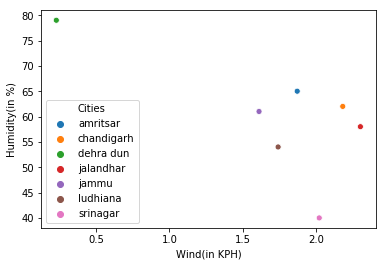

In [309]:
sns.scatterplot(x='Wind(in KPH)',y='Humidity(in %)',hue='Cities',data=North)

In [310]:
#sns.jointplot(x='Wind(in KPH)',y='Humidity(in %)',data=North,kind='reg')

In [311]:
South.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 17 to 78
Data columns (total 7 columns):
Cities                   7 non-null object
Temp(in °C)              7 non-null int64
Temp(in °F)              7 non-null int64
Humidity(in %)           7 non-null int64
Wind(in KPH)             7 non-null float64
Gusting(upto (in KPH)    7 non-null float64
Weather Type             7 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 448.0+ bytes


#  Temperature variations in Cities

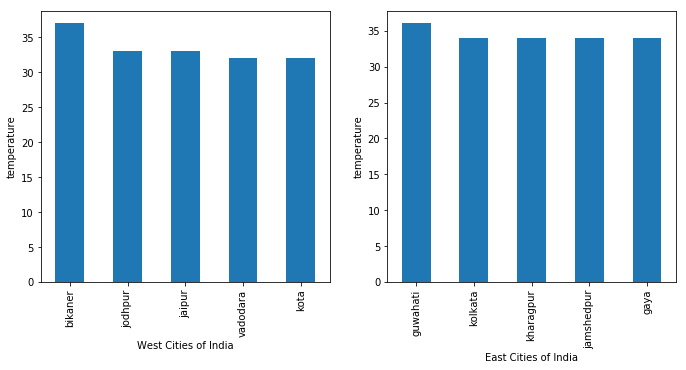

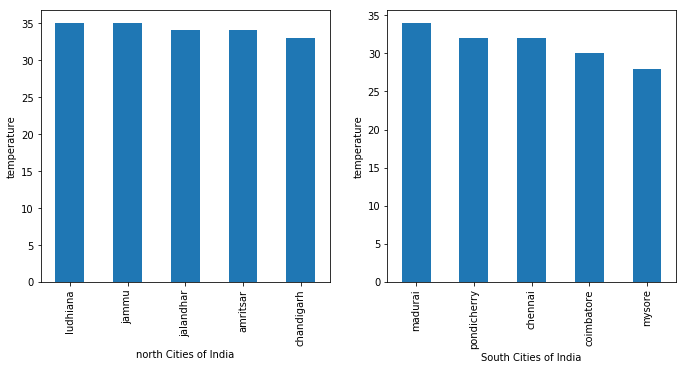

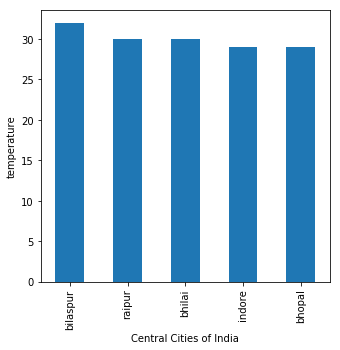

In [312]:
plt.figure(figsize=(30,5))
plt.subplot(1,5,1)
west1['Temp(in °C)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('West Cities of India')
plt.ylabel('temperature')
plt.subplot(1,5,2)
east1['Temp(in °C)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('East Cities of India')
plt.ylabel('temperature')
plt.show()
plt.figure(figsize=(30,5))
plt.subplot(1,5,3)
north1['Temp(in °C)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('north Cities of India')
plt.ylabel('temperature')
plt.subplot(1,5,4)
south1['Temp(in °C)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('South Cities of India')
plt.ylabel('temperature')
plt.show()
plt.figure(figsize=(30,5))
plt.subplot(1,5,5)
central1['Temp(in °C)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('Central Cities of India')
plt.ylabel('temperature')
plt.show()

In [313]:
west1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, bikaner to vadodara
Data columns (total 6 columns):
Temp(in °C)              7 non-null int64
Temp(in °F)              7 non-null int64
Humidity(in %)           7 non-null int64
Wind(in KPH)             7 non-null float64
Gusting(upto (in KPH)    7 non-null float64
Weather Type             7 non-null object
dtypes: float64(2), int64(3), object(1)
memory usage: 712.0+ bytes


 # Humidity  variation in Cities

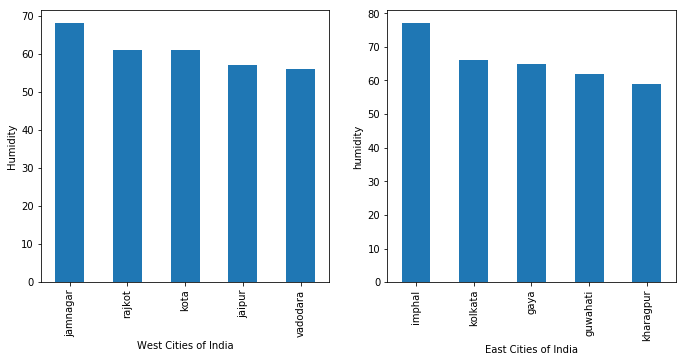

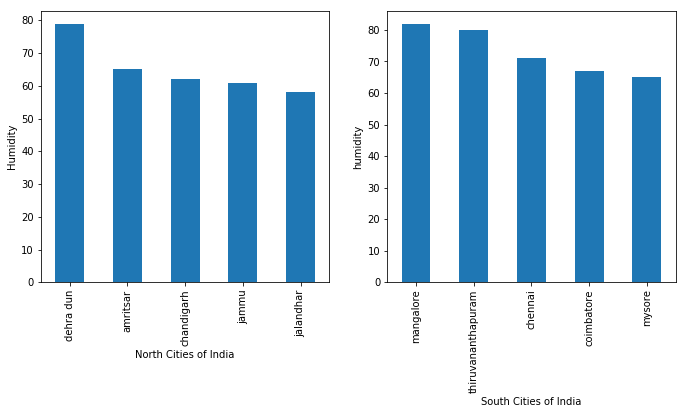

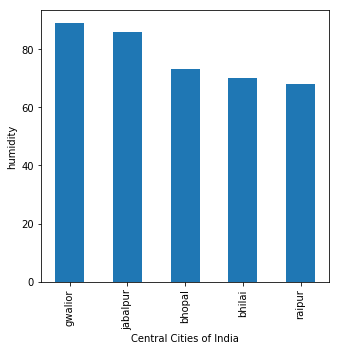

In [314]:
plt.figure(figsize=(30,5))
plt.subplot(1,5,1)
west1['Humidity(in %)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('West Cities of India')
plt.ylabel('Humidity')
plt.subplot(1,5,2)
east1['Humidity(in %)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('East Cities of India')
plt.ylabel('humidity')
plt.show()
plt.figure(figsize=(30,5))
plt.subplot(1,5,3)
north1['Humidity(in %)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('North Cities of India')
plt.ylabel('Humidity')
plt.subplot(1,5,4)
south1['Humidity(in %)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('South Cities of India')
plt.ylabel('humidity')
plt.show()
plt.figure(figsize=(30,5))
plt.subplot(1,5,5)
central1['Humidity(in %)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('Central Cities of India')
plt.ylabel('humidity')
plt.show()

#  Wind Variations in Cities


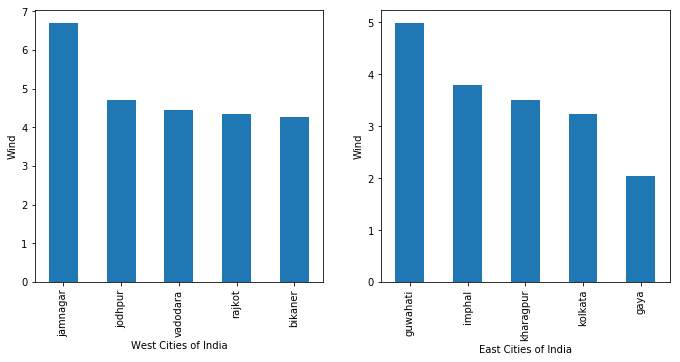

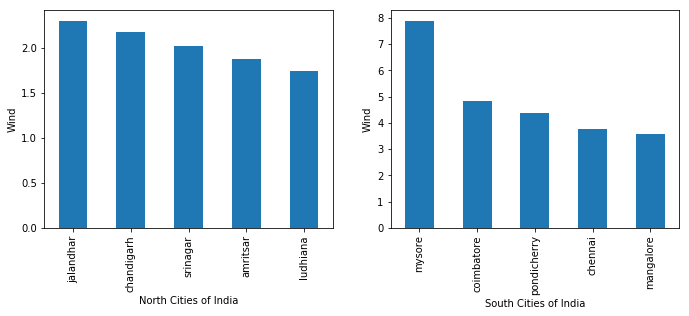

Text(0, 0.5, 'Wind')

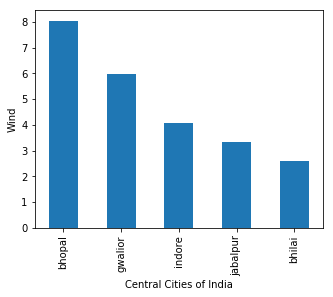

In [315]:
plt.figure(figsize=(30,5))
plt.subplot(1,5,1)
west1['Wind(in KPH)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('West Cities of India')
plt.ylabel('Wind')
plt.subplot(1,5,2)
east1['Wind(in KPH)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('East Cities of India')
plt.ylabel('Wind')
plt.show()
plt.figure(figsize=(30,4))
plt.subplot(1,5,3)
north1['Wind(in KPH)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('North Cities of India')
plt.ylabel('Wind')
plt.subplot(1,5,4)
south1['Wind(in KPH)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('South Cities of India')
plt.ylabel('Wind')
plt.show()
plt.figure(figsize=(30,4))
plt.subplot(1,5,5)
central1['Wind(in KPH)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('Central Cities of India')
plt.ylabel('Wind')


#  Gusting in Variations in Cities

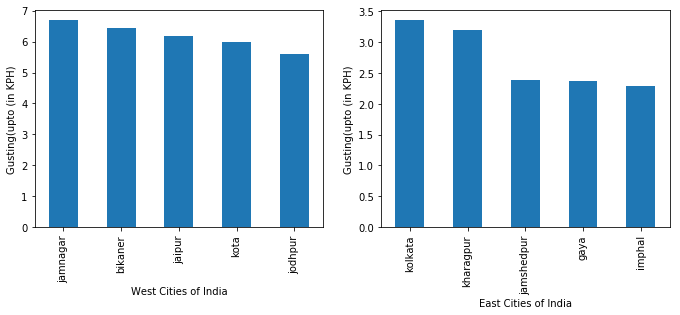

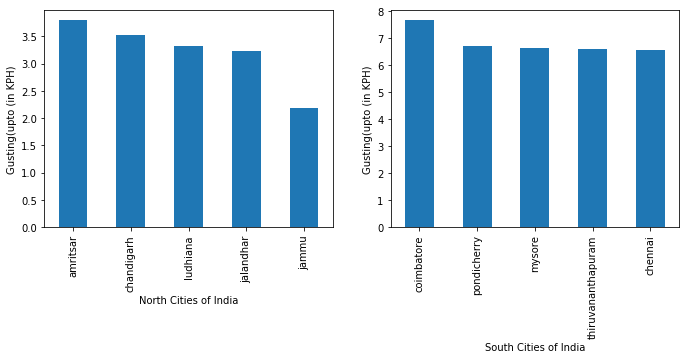

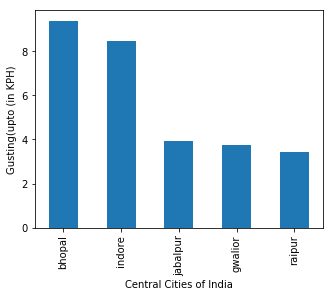

In [207]:
plt.figure(figsize=(30,4))
plt.subplot(1,5,1)
west1['Gusting(upto (in KPH)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('West Cities of India')
plt.ylabel('Gusting(upto (in KPH)')
plt.subplot(1,5,2)
east1['Gusting(upto (in KPH)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('East Cities of India')
plt.ylabel('Gusting(upto (in KPH)')
plt.show()
plt.figure(figsize=(30,4))
plt.subplot(1,5,3)
north1['Gusting(upto (in KPH)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('North Cities of India')
plt.ylabel('Gusting(upto (in KPH)')
plt.subplot(1,5,4)
south1['Gusting(upto (in KPH)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('South Cities of India')
plt.ylabel('Gusting(upto (in KPH)')
plt.show()
plt.figure(figsize=(30,4))
plt.subplot(1,5,5)
central1['Gusting(upto (in KPH)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('Central Cities of India')
plt.ylabel('Gusting(upto (in KPH)')
plt.show()

# North Vs South Temperature

Text(0, 0.5, 'temperature')

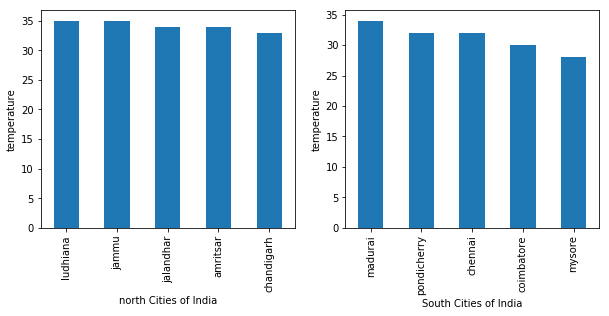

In [316]:

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
north1['Temp(in °C)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('north Cities of India')
plt.ylabel('temperature')
plt.subplot(1,2,2)
south1['Temp(in °C)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('South Cities of India')
plt.ylabel('temperature')

# North Vs South Humidity

Text(0, 0.5, 'humidity')

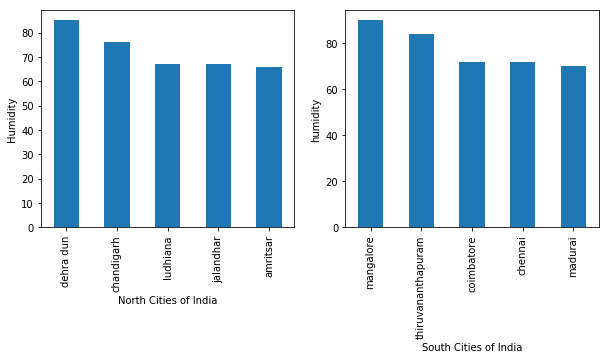

In [209]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
north1['Humidity(in %)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('North Cities of India')
plt.ylabel('Humidity')
plt.subplot(1,2,2)
south1['Humidity(in %)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('South Cities of India')
plt.ylabel('humidity')

# North Vs South Wind

Text(0, 0.5, 'Wind')

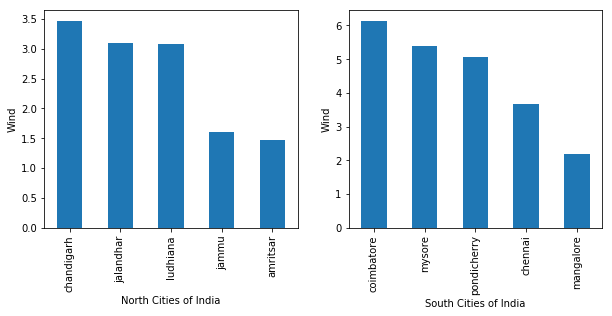

In [210]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
north1['Wind(in KPH)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('North Cities of India')
plt.ylabel('Wind')
plt.subplot(1,2,2)
south1['Wind(in KPH)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('South Cities of India')
plt.ylabel('Wind')

# North Vs South Gusting

Text(0, 0.5, 'Gusting(upto (in KPH)')

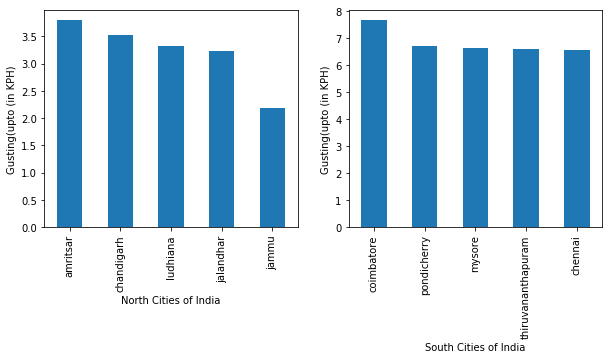

In [211]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
north1['Gusting(upto (in KPH)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('North Cities of India')
plt.ylabel('Gusting(upto (in KPH)')
plt.subplot(1,2,2)
south1['Gusting(upto (in KPH)'].sort_values(ascending=False).head().plot('bar')
plt.xlabel('South Cities of India')
plt.ylabel('Gusting(upto (in KPH)')

In [317]:
df['Wind(in KPH)'].min()

0.23

In [318]:
df['Wind(in KPH)'].max()

8.04

In [319]:
df['Temp(in °C)'].min()

26

In [320]:
df['Temp(in °C)'].max()

37

In [321]:
df['Humidity(in %)'].min()

38

In [322]:
df['Humidity(in %)'].max()

94

In [323]:
df.iloc[0]

Cities                                 ahmedabad
Temp(in °C)                                   36
Temp(in °F)                                   97
Humidity(in %)                                51
Wind(in KPH)                                2.11
Gusting(upto (in KPH)                       4.75
Weather Type             Humid and Partly Cloudy
Name: 0, dtype: object

In [324]:
df1=df.head(10)    # df1 is top 10 cities and its info.
df1

,Cities,Temp(in °C),Temp(in °F),Humidity(in %),Wind(in KPH),Gusting(upto (in KPH),Weather Type
0,ahmedabad,36,97,51,2.11,4.75,Humid and Partly Cloudy
1,ajmer,31,88,63,4.91,5.20,Humid and Mostly Cloudy
2,aligarh,29,84,73,4.24,6.50,Humid and Partly Cloudy
3,allahabad,32,90,69,1.36,1.36,Humid and Overcast
4,alwar,33,91,54,3.05,7.09,Humid and Mostly Cloudy
5,amritsar,34,93,65,1.87,2.61,Humid and Partly Cloudy
6,bengaluru,26,79,66,3.98,7.44,Mostly Cloudy
7,bellary,30,86,56,5.76,7.32,Partly Cloudy
8,bhilai,30,86,70,2.60,2.60,Humid and Mostly Cloudy
9,bhilwara,33,91,54,4.21,4.21,Humid and Partly Cloudy


In [325]:
df2=df.tail(10)     # df2 is bottom 10 cities and its info
df2

,Cities,Temp(in °C),Temp(in °F),Humidity(in %),Wind(in KPH),Gusting(upto (in KPH),Weather Type
77,surat,30,86,70,4.49,4.72,Overcast
78,thiruvananthapuram,27,81,80,1.66,7.94,Humid and Partly Cloudy
79,tiruchchirappalli,33,91,53,5.22,7.24,Partly Cloudy
80,tirupati,31,88,54,3.78,6.58,Humid and Mostly Cloudy
81,udaipur,30,86,65,4.09,4.27,Humid and Mostly Cloudy
82,vadodara,32,90,56,4.46,5.25,Humid and Overcast
83,varanasi,32,90,71,2.59,2.59,Humid and Partly Cloudy
84,vijayawada,34,93,63,2.13,6.52,Humid and Mostly Cloudy
85,visakhapatnam,33,91,59,3.32,3.43,Partly Cloudy
86,warangal,32,90,58,6.48,7.36,Mostly Cloudy


In [326]:
North

,Cities,Temp(in °C),Temp(in °F),Humidity(in %),Wind(in KPH),Gusting(upto (in KPH),Weather Type
5,amritsar,34,93,65,1.87,2.61,Humid and Partly Cloudy
16,chandigarh,33,91,62,2.18,2.20,Humid and Partly Cloudy
19,dehra dun,27,81,79,0.23,2.94,Humid and Mostly Cloudy
36,jalandhar,34,93,58,2.30,2.30,Humid and Mostly Cloudy
37,jammu,35,95,61,1.61,1.63,Humid and Mostly Cloudy
49,ludhiana,35,95,54,1.74,1.74,Humid
76,srinagar,28,82,40,2.02,2.02,Mostly Cloudy


In [327]:

#plt.subplot(1,2,1)
#sns.catplot(y='Humidity(in %)',x='Cities',hue='Weather Type',data=North)
#plt.subplot(1,2,2)
#sns.catplot(y='Humidity(in %)',x='Cities',hue='Weather Type',data=South)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

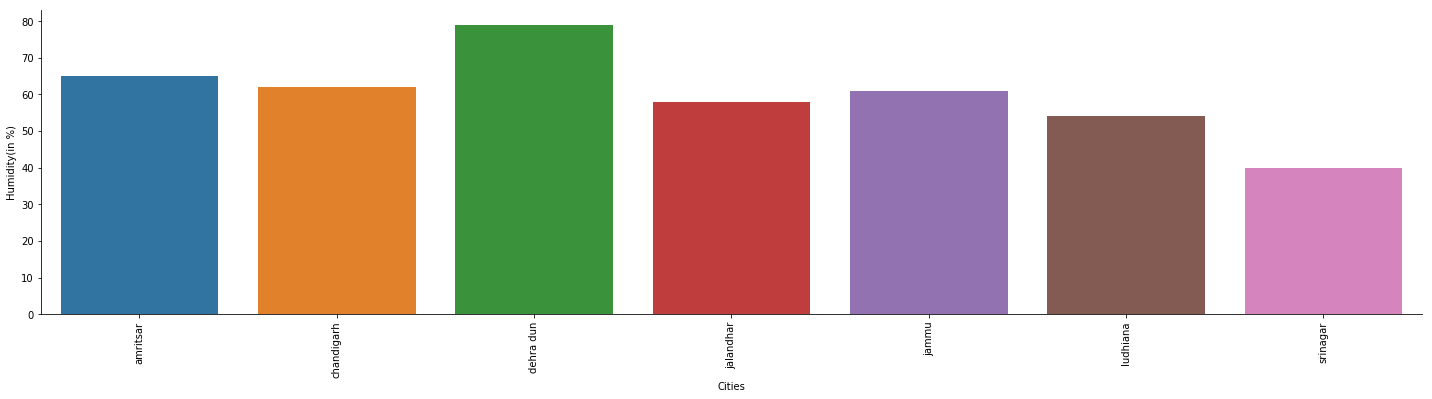

In [328]:
sns.catplot(y='Humidity(in %)',x='Cities',data=North,kind='bar',aspect=4)
plt.xticks(rotation='vertical')

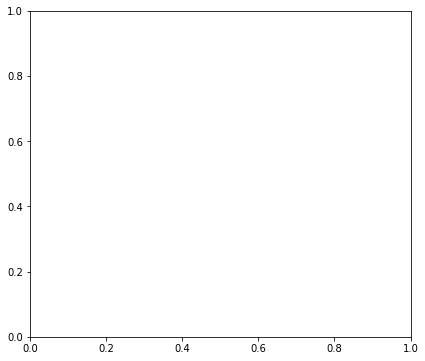

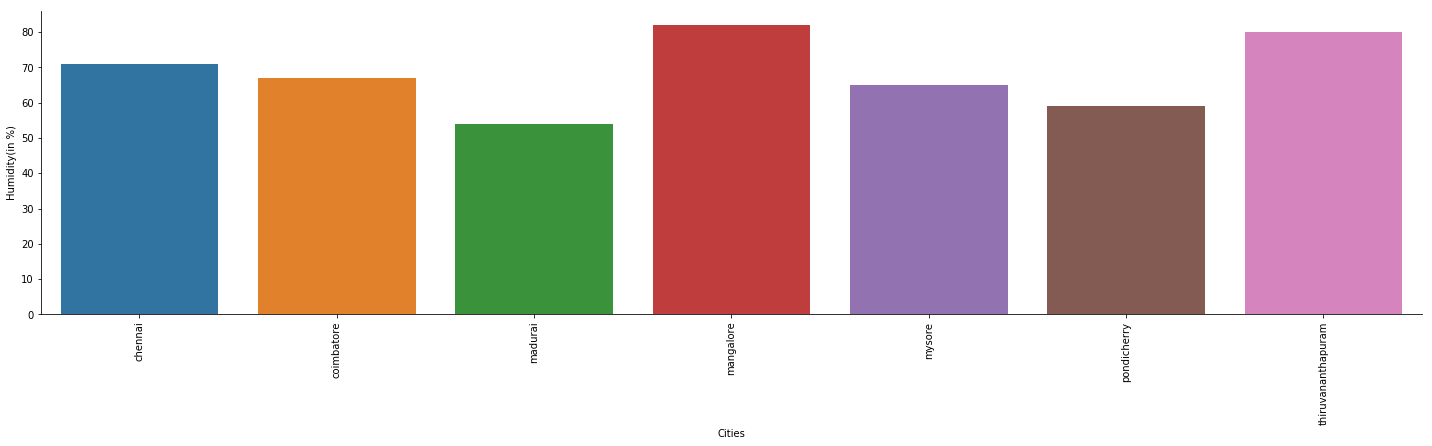

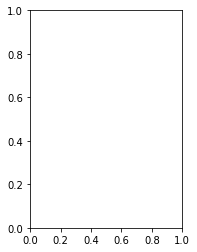

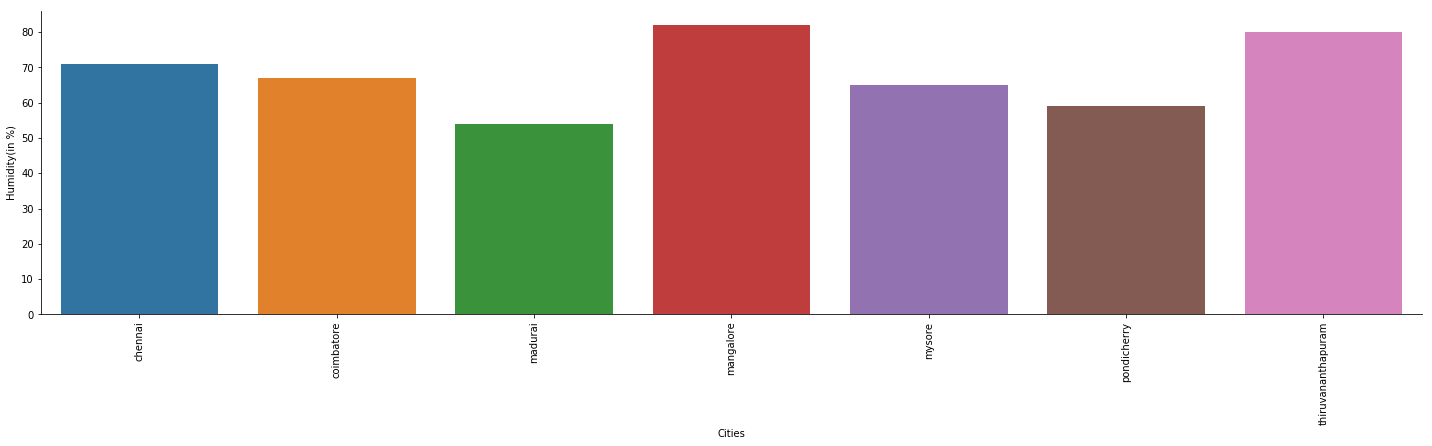

In [329]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.catplot(y='Humidity(in %)',x='Cities',data=South,kind='bar',aspect=4)
plt.xticks(rotation='vertical')
plt.show()
plt.subplot(1,2,2)
sns.catplot(y='Humidity(in %)',x='Cities',data=South,kind='bar',aspect=4)
plt.xticks(rotation='vertical')
plt.show()




#####  Histogram of Humidity of top 10 rows

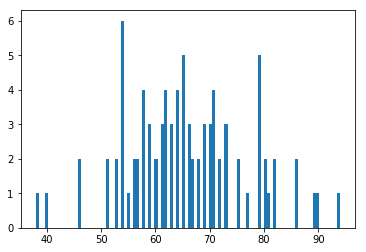

In [330]:

plt.hist(x='Humidity(in %)',data=df,bins=100)
plt.show()

#####  Histogram of Humidity of bottom 10 rows

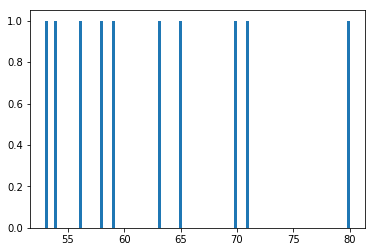

In [331]:
plt.hist(x='Humidity(in %)',histtype='bar',data=df2,bins=100)
plt.show()

In [332]:
import numpy as np

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

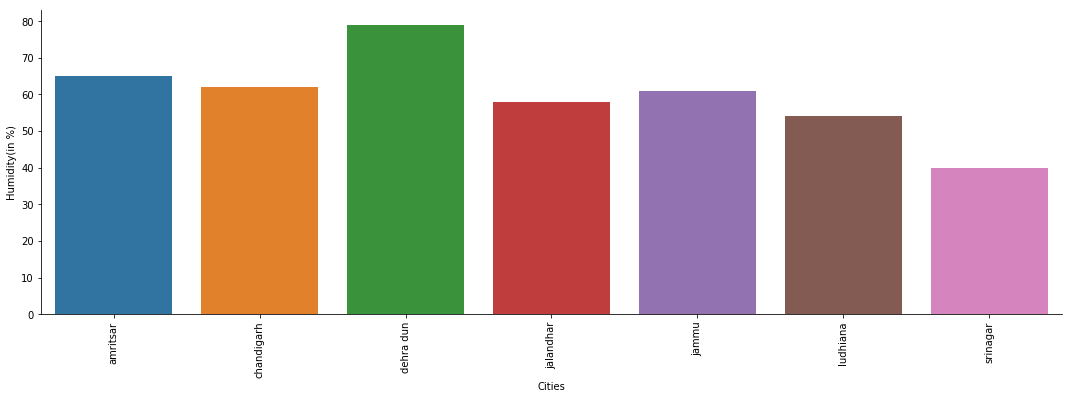

In [333]:
sns.catplot(y='Humidity(in %)',x='Cities',data=North,kind='bar',aspect=3)
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

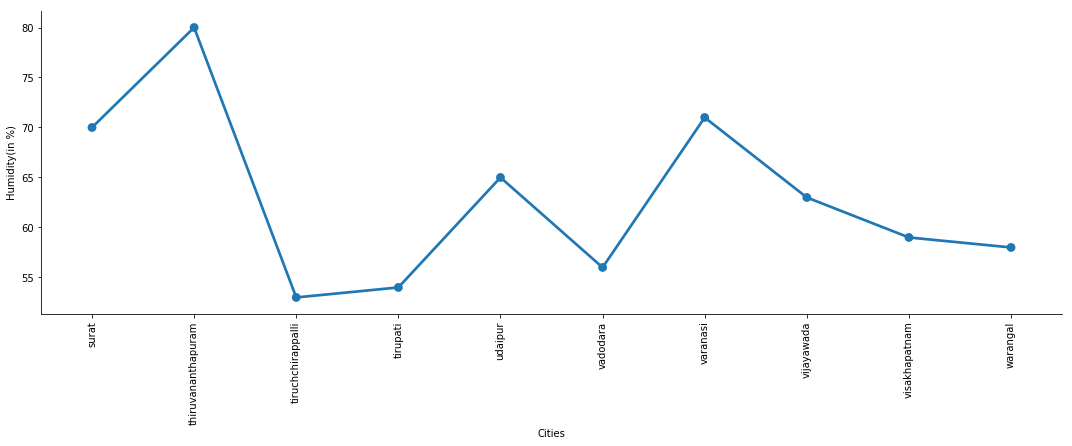

In [334]:
sns.catplot(y='Humidity(in %)',x='Cities',data=df2,kind='point',aspect=3)
plt.xticks(rotation='vertical')

### Conclusion:-
        - Hubli city have the maximum humidity (98%) on the date of 05 Aug 2019
        - Srinagar city have the minimum humidity (37%) on the date of 05 Aug 2019

##### Histogram of Gusting in KPH(Kilometer Per Hour) of top 10 rows

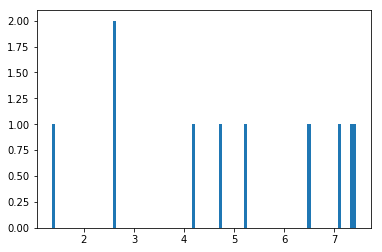

In [335]:
plt.hist(x='Gusting(upto (in KPH)',data=df1,bins=100)
plt.show()

##### Histogram of Gusting in KPH(Kilometer Per Hour) of bottom 10 rows

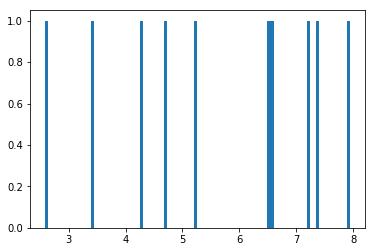

In [338]:
plt.hist(x='Gusting(upto (in KPH)',data=df2,bins=100)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86]), <a list of 87 Text xticklabel objects>)

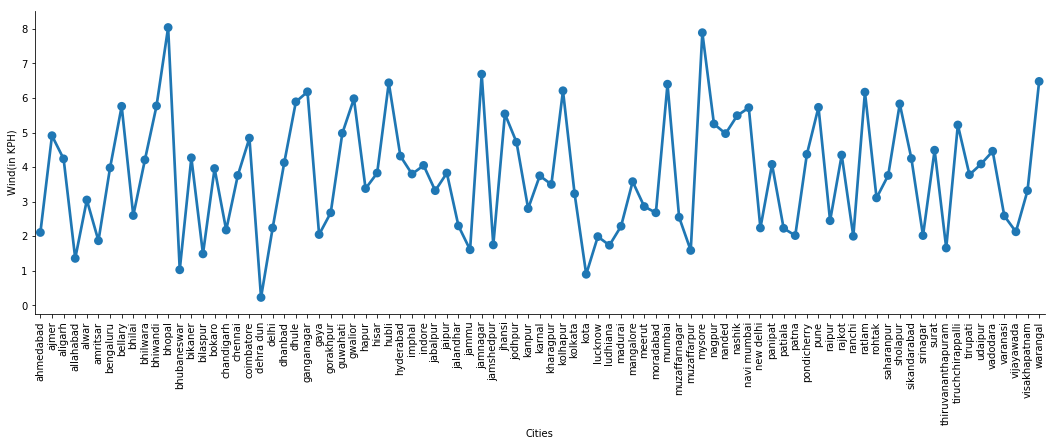

In [339]:
sns.catplot(y='Wind(in KPH)',x='Cities',data=df,kind='point',aspect=3)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

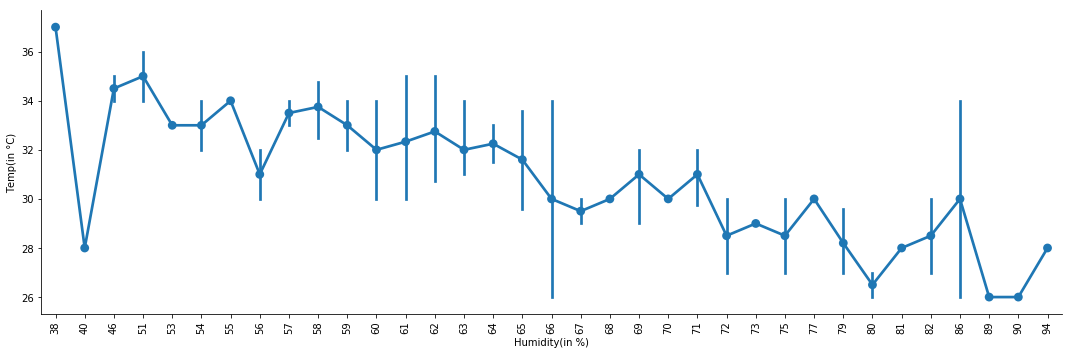

In [360]:
sns.catplot(y='Temp(in °C)',x='Humidity(in %)',data=df,kind='point',aspect=3)
plt.xticks(rotation='vertical')

### Conclusion:-
        - Bellary city has the maximum wind blowing power in the date of 05 Aug 2019
        - Amritsar city has the lowest wind blowing power in the date of 05 Aug 2019
        

# Categorical graph of Wind v/s Gusting(variation) of top 10 Cities

Text(0.5, 20.80000000000002, 'Top Ten Cities')

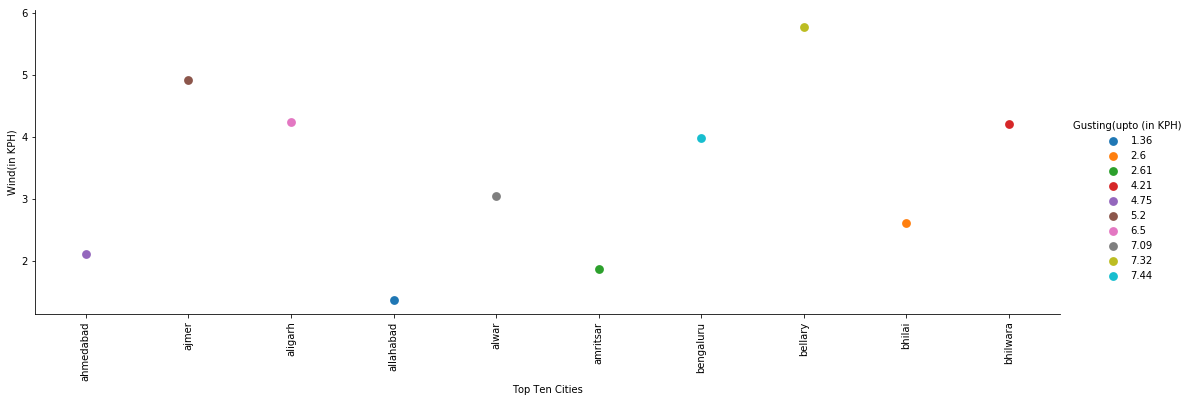

In [359]:
sns.catplot(y='Wind(in KPH)',x='Cities',data=df1,kind='point',aspect=3,hue='Gusting(upto (in KPH)')
plt.xticks(rotation='vertical')
plt.xlabel('Top Ten Cities')

In [341]:
sns.catplot(x='Gusting(upto (in KPH)',data=df2,kind='pie',aspect=3)

ValueError: Plot kind 'pie' is not recognized

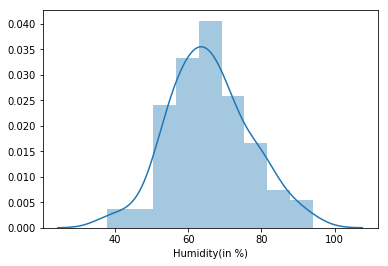

In [342]:
# dritribution of humidity
sns.distplot(df['Humidity(in %)'])

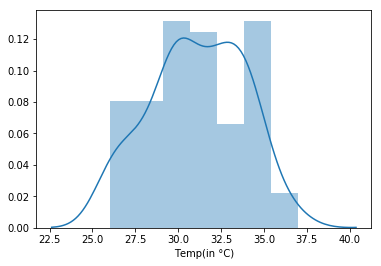

In [343]:
# dritribution of Temperature in Celcius
sns.distplot(df['Temp(in °C)'])

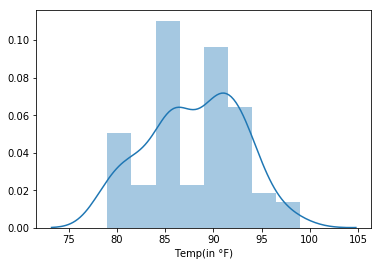

In [344]:
# dritribution of Temperature in farenhite
sns.distplot(df['Temp(in °F)'])

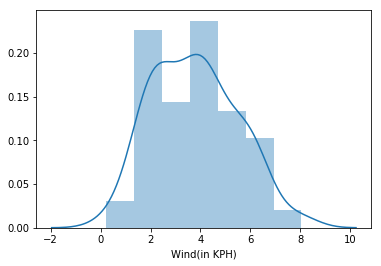

In [345]:
0# dritribution of  Wind
sns.distplot(df['Wind(in KPH)'])

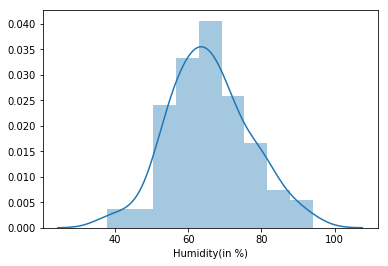

In [346]:
sns.distplot(df['Humidity(in %)'])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


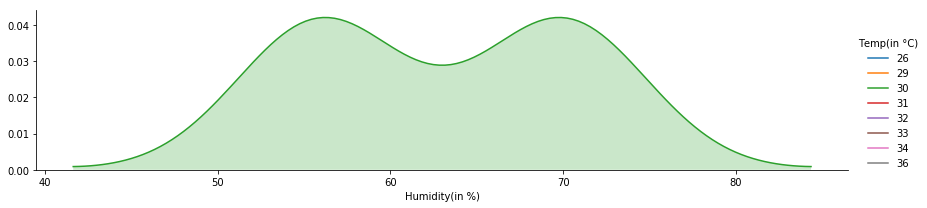

In [347]:
fig=sns.FacetGrid(data=df1,aspect=4,hue='Temp(in °C)')
fig.map(sns.kdeplot,'Humidity(in %)',shade=True)
fig.add_legend()

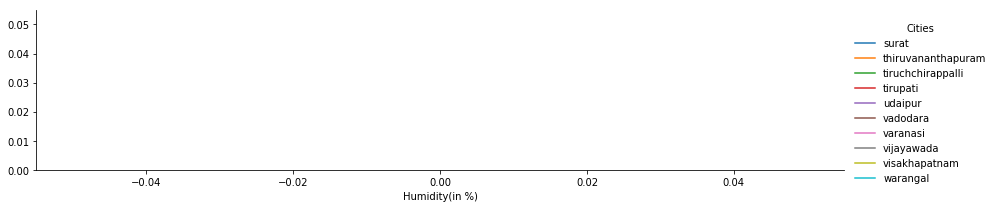

In [348]:
fig=sns.FacetGrid(data=df2,aspect=4,hue='Cities')
fig.map(sns.kdeplot,'Humidity(in %)',shade=True)
fig.add_legend()

##### Categorical Graph between Humidity and Cities of top 10 Cities

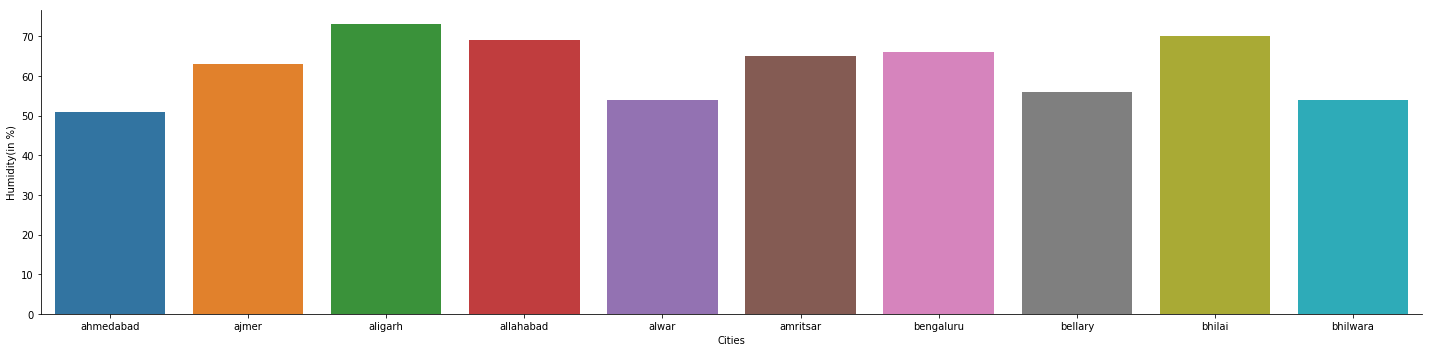

In [349]:

sns.catplot(x='Cities',y='Humidity(in %)',data=df1,kind='bar',aspect=4)

#### Categorical Graph between Humidity and Cities of bottom 10 Cities

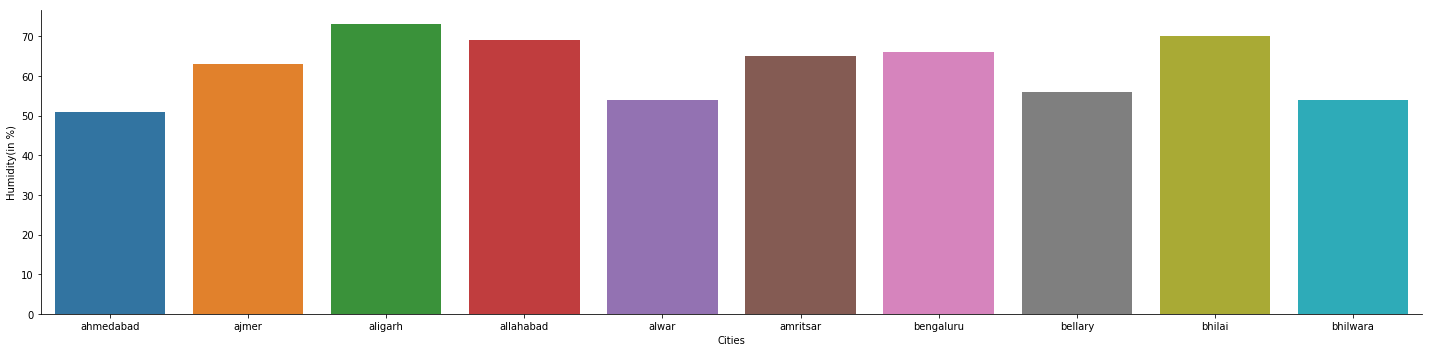

In [350]:

sns.catplot(x='Cities',y='Humidity(in %)',data=df1,kind='bar',aspect=4)

#### Categoical Graph between Temp and Humidity in Violin form

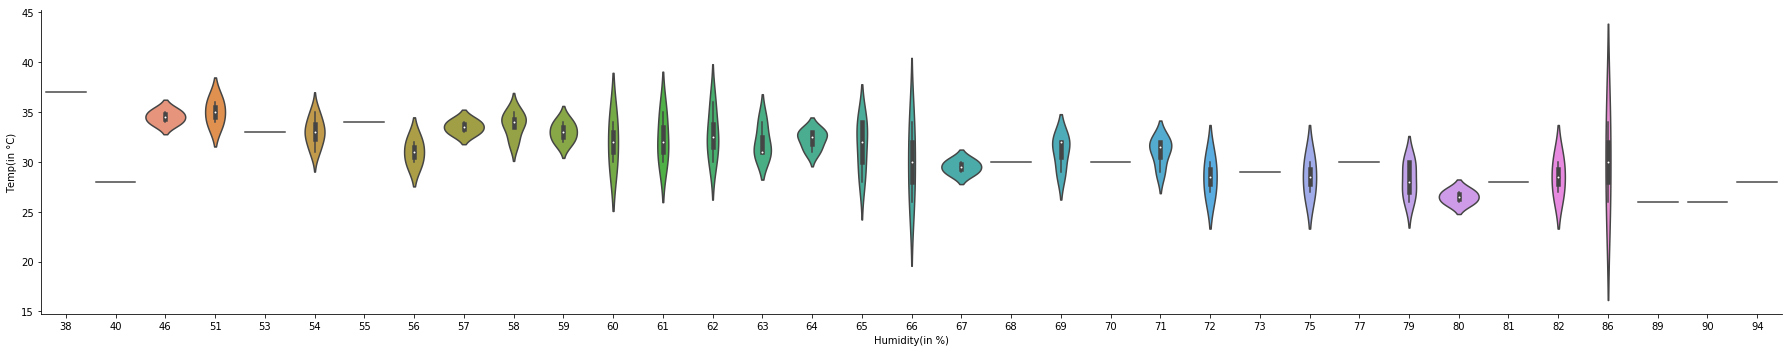

In [351]:

sns.catplot(y='Temp(in °C)',x='Humidity(in %)',data=df,kind='violin',aspect=5)

###### Categorical plots of Humidity vs Temp in Point form

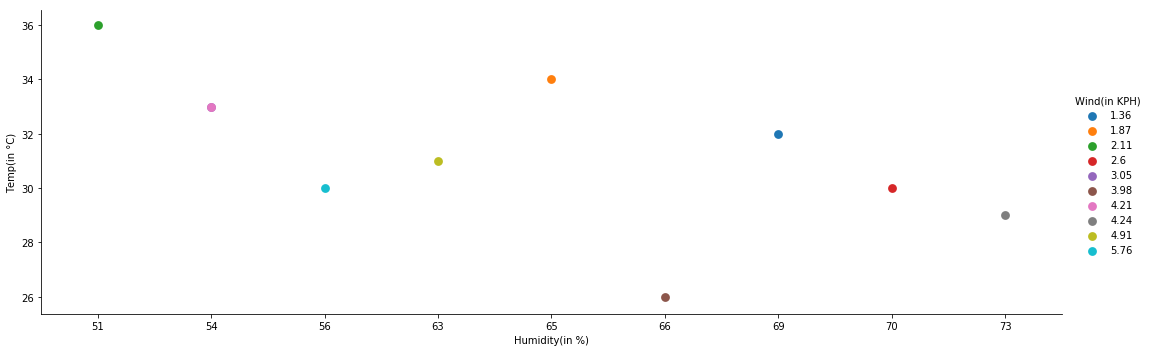

In [356]:
sns.catplot(y='Temp(in °C)', x='Humidity(in %)',data=df1,kind='point',aspect=3,hue='Wind(in KPH)')

# Temperature v/s Humidity Graph

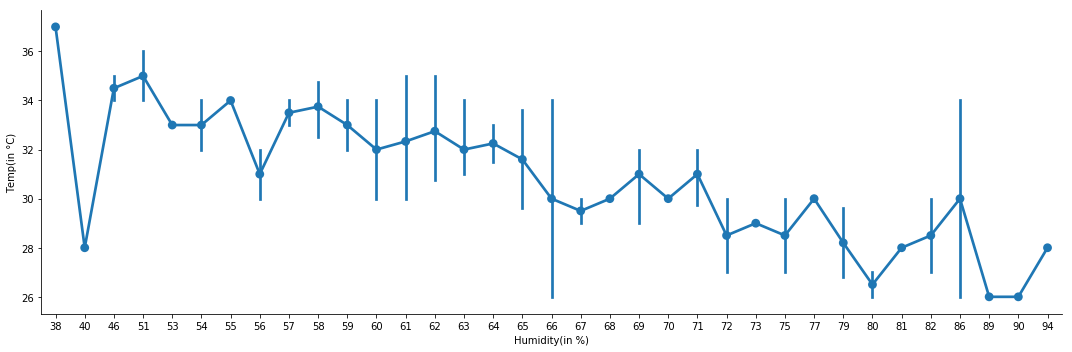

In [353]:
sns.catplot(y='Temp(in °C)', x='Humidity(in %)',data=df,kind='point',aspect=3)

# Conclusion-
    - Humidity and Temperature are inversly proportion to each other
    - If Temperature increases then Humidity decreases.

###### Categorical graph between Temperature and Cities

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86]), <a list of 87 Text xticklabel objects>)

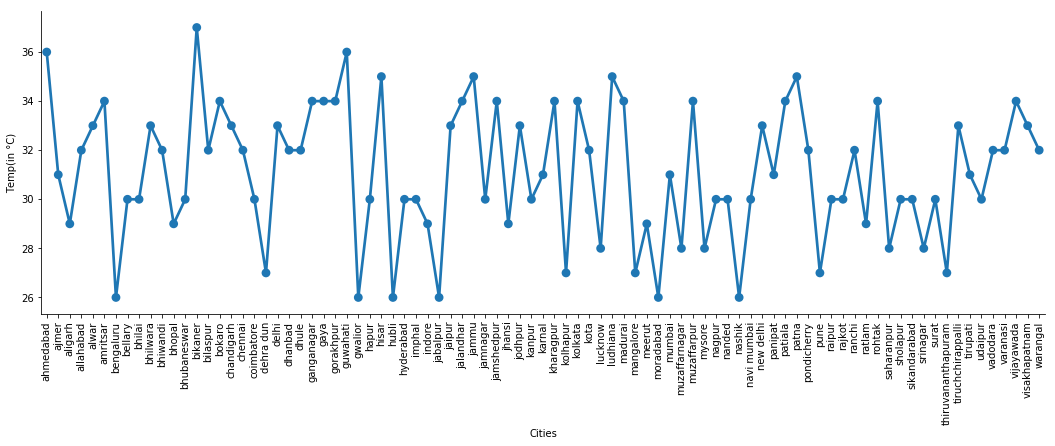

In [354]:
sns.catplot(y='Temp(in °C)',x='Cities',data=df,kind='point',aspect=3)
plt.xticks(rotation='vertical')

Text(0.5, 6.79999999999999, 'Cities')

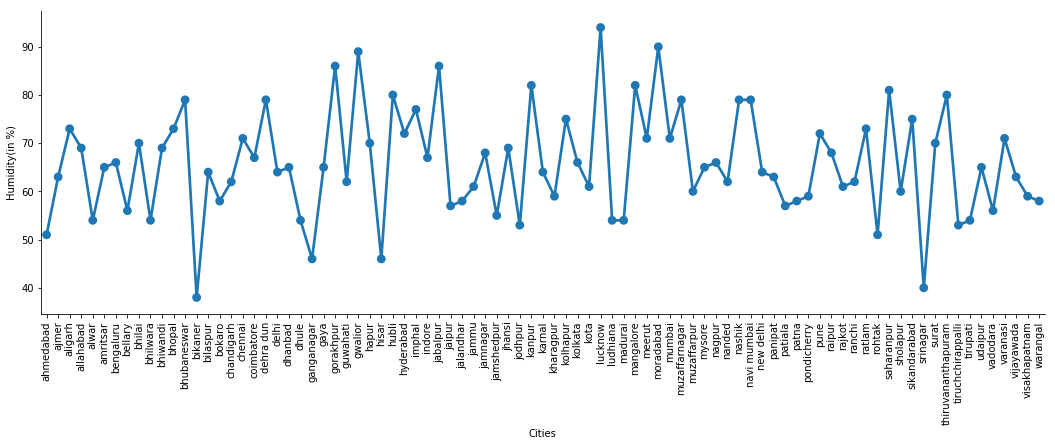

In [355]:
sns.catplot(y='Humidity(in %)',x='Cities',data=df,kind='point',aspect=3)
plt.xticks(rotation='vertical')
plt.xlabel('Cities')

# Conclusion
    - Guwahati is having the maximum (37°C) temperature on the date of 05-Aug 2019
    - Hubli is having the minimum (21°C) temperature on the date of 05-Aug 2019

In [358]:
df['Wind(in KPH)'].max()

8.04

In [ ]:
df.head()

In [ ]:
df['Weather Type'].value_counts()